# Sampyo

1. classification model
2. 7class
3. 2.5% + 5%

## Import module

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
import random

Using TensorFlow backend.
/home/cai/anaconda3/envs/MRCNN/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/cai/anaconda3/envs/MRCNN/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/cai/anaconda3/envs/MRCNN/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/cai/anaconda3/envs/MRCNN/l

## train data / test data

In [2]:
dataset_name = "./crop_dataset_dry"

x_train = []
y_train = []
x_test = []
y_test = []

folder_list = os.listdir(dataset_name)
folder_list.sort()

In [3]:
folder_list

['2.4', '2.6', '2.8', '3.0', '3.2', '3.4', '3.61']

In [4]:
"""folder_list25 = []
folder_list5 = []
for i in folder_list:
    if i[-3] == '.':
        folder_list25.append(i)
    else:
        folder_list5.append(i)"""

"folder_list25 = []\nfolder_list5 = []\nfor i in folder_list:\n    if i[-3] == '.':\n        folder_list25.append(i)\n    else:\n        folder_list5.append(i)"

In [5]:
def CLAHE(img, limit = 2.0, grid = 8):
    clahe = cv2.createCLAHE(clipLimit = limit, tileGridSize = (grid, grid))
    return clahe.apply(img)

for one_folder in folder_list:
    
    eveloped_one_folder = one_folder
    # eveloped_one_folder : classname
    print(one_folder)
    
    join_folder_path = os.path.join(dataset_name, one_folder)
    # dataset folder path
    data_list = os.listdir(join_folder_path)
    # data list in folder
    
    ## train / test = 8:2
    test_list = random.sample(data_list, int(len(data_list) * 0.2))

    for one_data in data_list:
        
        join_data_path = os.path.join(join_folder_path, one_data)
        # each data path
        
        ### imread / resize / normalize
        img = cv2.imread(join_data_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (512,512))
        img = CLAHE(img) # apply equalization
        img = np.reshape(img, (512,512,1)) # one channel

        # train
        if not one_data in test_list:
            # if data is not in test_list which is sampled before, add data in x_train, and class in y_train
            x_train.append(img)
            y_train.append(eveloped_one_folder)
            
        elif one_data in test_list:
            x_test.append(img)
            y_test.append(eveloped_one_folder)

            
tmp = [[x,y] for x,y in zip(x_train, y_train)]
random.shuffle(tmp)

x_train = [n[0] for n in tmp]
y_train = [n[1] for n in tmp]
            
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)  
y_test = np.array(y_test)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

2.4
2.6
2.8
3.0
3.2
3.4
3.61
(10088, 512, 512, 1)
(10088,)
(2518, 512, 512, 1)
(2518,)


In [6]:
x_train

array([[[[212],
         [210],
         [170],
         ...,
         [163],
         [171],
         [194]],

        [[191],
         [212],
         [155],
         ...,
         [178],
         [116],
         [151]],

        [[248],
         [170],
         [139],
         ...,
         [161],
         [144],
         [178]],

        ...,

        [[159],
         [168],
         [ 74],
         ...,
         [196],
         [182],
         [152]],

        [[ 61],
         [133],
         [193],
         ...,
         [180],
         [166],
         [178]],

        [[126],
         [117],
         [177],
         ...,
         [234],
         [196],
         [201]]],


       [[[175],
         [216],
         [213],
         ...,
         [184],
         [199],
         [176]],

        [[177],
         [116],
         [200],
         ...,
         [156],
         [217],
         [202]],

        [[188],
         [221],
         [216],
         ...,
         [212],
         [

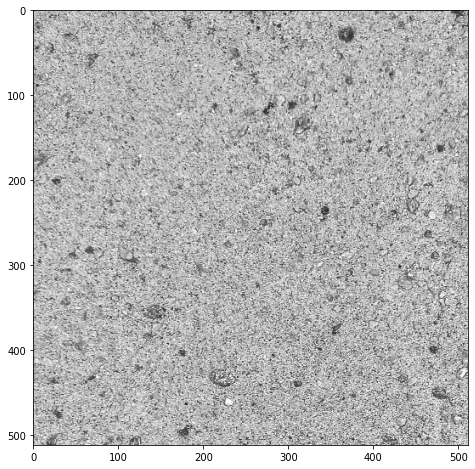

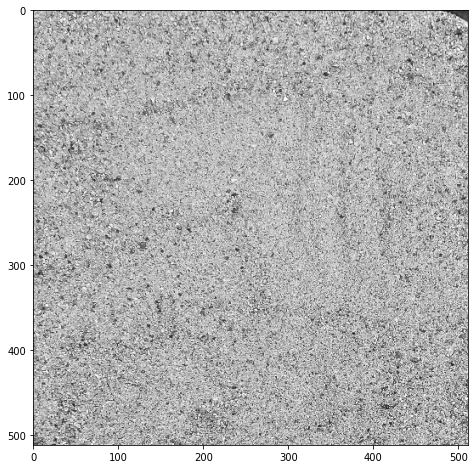

In [7]:
plt.figure(figsize=(8,8))
plt.imshow(x_train[1].reshape(512,512), cmap="gray")

plt.figure(figsize=(8,8))
plt.imshow(x_test[0].reshape(512,512), cmap="gray")

## Y data onehot encoding

* ex1) 2 -> [1,0,0,0,0,0]
* ex2) 7 -> [0,0,0,0,0,1]

In [8]:
from sklearn.preprocessing import OneHotEncoder

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

enc = OneHotEncoder()
enc.fit(y_train)

y_train_onehot = enc.transform(y_train).toarray()
y_test_onehot = enc.transform(y_test).toarray()

print(y_test_onehot)
print(y_test)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
[['2.4']
 ['2.4']
 ['2.4']
 ...
 ['3.61']
 ['3.61']
 ['3.61']]


## Import keras module

In [9]:
import keras

from keras.layers import Conv2D
from keras.layers import MaxPooling2D, LeakyReLU
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Dropout
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization

from keras.utils import multi_gpu_model

from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K

In [10]:
inputs = Input((512, 512, 1))

# Layer 1
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(inputs)
x = LeakyReLU(alpha = 0.1)(x)
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = MaxPooling2D(pool_size = 2, strides = 2)(x)

# Layer 2
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = MaxPooling2D(pool_size = 2, strides = 2)(x)

# Layer 3
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = MaxPooling2D(pool_size = 2, strides = 2)(x)

# Layer 4
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = MaxPooling2D(pool_size = 2, strides = 2)(x)

# Layer 5
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = MaxPooling2D(pool_size = 2, strides = 2)(x)

# Layer 6
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = MaxPooling2D(pool_size = 2, strides = 2)(x)

# Layer 7
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = MaxPooling2D(pool_size = 2, strides = 2, name = 'last_pool')(x)

x = Flatten()(x)
x = Dense(128,kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = Dense(64,kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
outputs = Dense(7, activation = 'softmax',kernel_initializer="glorot_normal")(x)

model = Model(inputs=[inputs], outputs=[outputs])

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 512, 512, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 512, 512, 128)     1280      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512, 512, 128)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 512, 512, 128)     147584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512, 512, 128)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 256, 256, 128)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 256, 256, 128)     147584    
__________

In [12]:
parallel_model = multi_gpu_model(model,gpus=2)

# optimizer
adam = keras.optimizers.Adam(lr=0.000001)
parallel_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

## Deep Learning Model

In [14]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train_onehot,y_val_onehot = train_test_split(x_train,y_train_onehot, test_size = 0.1, shuffle = True, random_state = 42)

In [36]:
parallel_model.load_weights('./minyoung_checkpoint/cp--2.5percent800--0250.ckpt')

In [41]:
#early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor = 'val_loss', verbose = 0, patience = 20, mode = 'auto')

#checkpoint
checkpoint_path = './dry_ckpt/dry--{epoch:04d}.ckpt'
cp_dir = os.path.dirname(checkpoint_path)
checkpoint = keras.callbacks.ModelCheckpoint(checkpoint_path, verbose = 1,save_weights_only=True,save_best_only=True, period = 5)

In [42]:
history = parallel_model.fit(x_train, y_train_onehot,\
                          epochs=500, batch_size=4,\
                          validation_data=(x_val, y_val_onehot),\
                          callbacks = [checkpoint, early_stopping])


Train on 9079 samples, validate on 1009 samples
Epoch 1/500
9079/9079 [==============================] - 258s 28ms/step - loss: 0.3524 - acc: 0.8728 - val_loss: 0.3364 - val_acc: 0.8900
Epoch 2/500
9079/9079 [==============================] - 258s 28ms/step - loss: 0.3493 - acc: 0.8739 - val_loss: 0.2907 - val_acc: 0.9049
Epoch 3/500
9079/9079 [==============================] - 259s 28ms/step - loss: 0.3440 - acc: 0.8764 - val_loss: 0.3408 - val_acc: 0.8781
Epoch 4/500
9079/9079 [==============================] - 259s 29ms/step - loss: 0.3389 - acc: 0.8802 - val_loss: 0.3574 - val_acc: 0.8821
Epoch 5/500
9076/9079 [============================>.] - ETA: 0s - loss: 0.3330 - acc: 0.8785
Epoch 00005: val_loss improved from inf to 0.43814, saving model to ./dry_ckpt/dry--0005.ckpt
9079/9079 [==============================] - 260s 29ms/step - loss: 0.3329 - acc: 0.8785 - val_loss: 0.4381 - val_acc: 0.8285
Epoch 6/500
9079/9079 [==============================] - 259s 28ms/step - loss: 0.3322

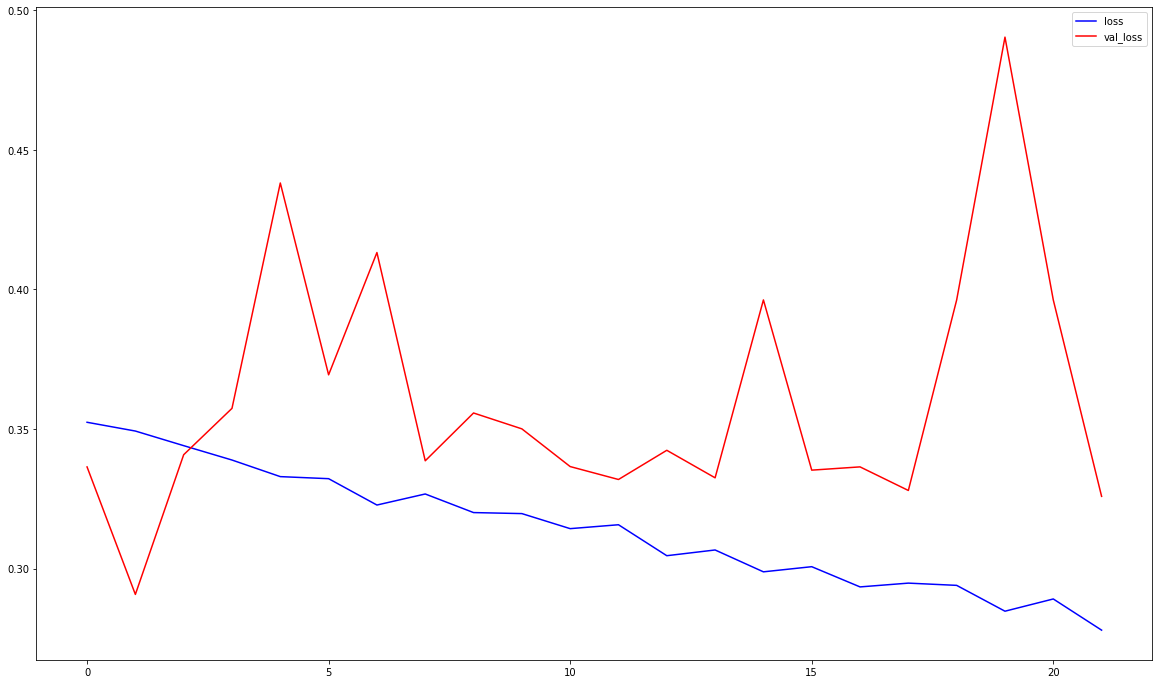

In [43]:
# plot loss & val_loss
plt.figure(figsize=(20,12))
plt.plot(history.history['loss'],'b',label='loss')
plt.plot(history.history['val_loss'],'r',label='val_loss')
#plt.xticks(np.arange(0,50,1))
plt.legend(loc="upper right");

# re train(only you need)

## Predict

In [44]:
pred_y = parallel_model.predict(x_test)


In [45]:
y_test_onehot

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [46]:
pred_y = np.argmax(pred_y,axis=1 )
real_y = np.argmax(y_test_onehot,axis=1)

print(pred_y)
print(real_y)

[0 0 0 ... 6 6 6]
[0 0 0 ... 6 6 6]


In [47]:
corr_num1 = 0
corr_num2 = 0
for i in range(real_y.shape[0]):
    if pred_y[i] == real_y[i]:
        corr_num1 += 1
        
    if abs(int(pred_y[i]) - int(real_y[i])) <= 1:
        corr_num2 += 1
        
print(corr_num1 / real_y.shape[0] * 100, "%")
print(corr_num2 / real_y.shape[0] * 100, "%")

87.37092930897538 %
96.90230341540905 %


## Confusion Matrix

In [48]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(pred_y, real_y)

['2.4', '2.6', '2.8', '3.0', '3.2', '3.4', '3.61']


<AxesSubplot:>

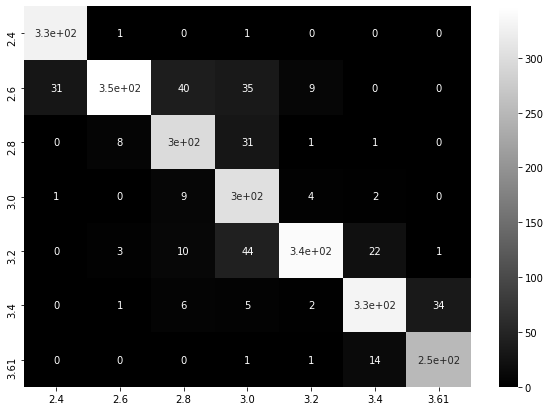

In [52]:
import seaborn as sn
import pandas as pd


cm_list = []
for one_folder in folder_list:
    cm_list.append(one_folder)
    cm_list = set(cm_list)
    cm_list = list(cm_list)
    cm_list.sort()
print(cm_list)
df_cm = pd.DataFrame(conf_mat, index = [i for i in cm_list],
                  columns = [i for i in cm_list])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap="gray")

<AxesSubplot:>

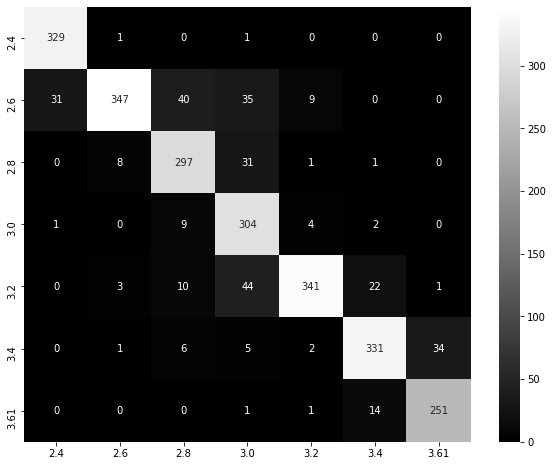

In [53]:
plt.figure(figsize = (10,8))
sn.heatmap(df_cm, annot=True, cmap="gray", fmt="g")

In [54]:
model.save("dry_CLAHE")

In [1]:
m = load_model('5%model_transferedDry')
pred_y = m.predict(x_test)

pred_y = np.argmax(pred_y,axis=1 )
real_y = np.argmax(y_test_onehot,axis=1)

corr_num1 = 0
corr_num2 = 0
for i in range(real_y.shape[0]):
    if pred_y[i] == real_y[i]:
        corr_num1 += 1
        
    if abs(int(pred_y[i]) - int(real_y[i])) <= 1:
        corr_num2 += 1
        
print(corr_num1 / real_y.shape[0] * 100, "%")
print(corr_num2 / real_y.shape[0] * 100, "%")

NameError: name 'load_model' is not defined